### Student Information
Name: 楊叔晴

Student ID: 109071019

GitHub ID: shuching

Kaggle name: 
ShuChing Yang

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

![title](img/pic0.png)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize

## 1. Load data

In [7]:
data_identification = pd.read_csv("data/data_identification.csv")
emotion = pd.read_csv("data/emotion.csv")
sampleSubmission = pd.read_csv("data/sampleSubmission.csv")
raw_data = pd.read_json('data/tweets_DM.json',lines = True)

In [8]:
# check data
data_identification[:10]

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
5,0x2a8830,train
6,0x20b21d,train
7,0x2452cf,train
8,0x2d729d,train
9,0x2ab56d,train


In [9]:
# check emotion data
emotion[:10]

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
5,0x34cd80,joy
6,0x33f099,sadness
7,0x2ae7b7,sadness
8,0x2408d4,trust
9,0x2b193b,sadness


In [10]:
# check sampleSubmission data
sampleSubmission[:10]

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
5,0x1dff4a,surprise
6,0x243512,surprise
7,0x27aa7d,surprise
8,0x1e983c,surprise
9,0x1e55ec,surprise


In [11]:
# check raw_data data
raw_data[:10]

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
5,120,hashtag_tweets,"{'tweet': {'hashtags': ['authentic', 'LaughOut...",2015-06-11 04:44:05,tweets
6,1021,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2c91...",2015-08-18 02:30:07,tweets
7,481,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x368e...",2015-08-20 14:31:27,tweets
8,827,hashtag_tweets,"{'tweet': {'hashtags': ['LeagueCup'], 'tweet_i...",2016-04-18 13:01:02,tweets
9,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets


In [12]:
# split the _source columns
df = pd.json_normalize(data=raw_data['_source'])

# rename column names of source
df=df.rename(index=str,columns={"tweet.text":"text", "tweet.tweet_id":"tweet_id","tweet.hashtags":"hashtags"})

In [13]:
# check normalized and renamed raw data
df[:10]

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>
7,[],0x368e95,Love knows no gender. 😢😭 <LH>
8,[LeagueCup],0x249c0c,@DStvNgCare @DStvNg More highlights are being ...
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...


In [14]:
# add identification the dataframe
df=pd.merge(df,data_identification, on="tweet_id")

## 2. Clean the text column

In [15]:
# clean the text
import re
from string import punctuation

def preprocess_text(text):
    text = text.lower()  #  lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # remove punctuation
    text = " ".join(text.split())  # remove extra spaces, tabs, and new lines
    return text

df['text'] = df['text'].map(preprocess_text)

In [16]:
# check the clean text
df[:10]

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,people who post add me on snapchat must be deh...,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,brianklaas as we see trump is dangerous to fre...,train
2,[bibleverse],0x28b412,confident of your obedience i write to you kno...,test
3,[],0x1cd5b0,now issa is stalking tasha 😂😂😂 lh,train
4,[],0x2de201,trust is not the same as faith a friend is som...,test
5,"[authentic, LaughOutLoud]",0x1d755c,riskshow thekevinallison thx for the best time...,train
6,[],0x2c91a8,still waiting on those supplies liscus lh,train
7,[],0x368e95,love knows no gender 😢😭 lh,train
8,[LeagueCup],0x249c0c,dstvngcare dstvng more highlights are being sh...,train
9,"[materialism, money, possessions]",0x218443,when do you have enough when are you satisfied...,test


In [17]:
# split into train and test dataset
train_df = df[df['identification']=='train']
train_df = pd.merge(train_df, emotion, on='tweet_id')

test_df = df[df['identification']=='test']
test_df["emotion"]=""

C:\Users\User\AppData\Local\Temp\ipykernel_10616\630164395.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["emotion"]=""


In [18]:
# drop the identification and hashtags column
train_df = train_df.drop(['identification'], axis=1)
test_df = test_df.drop(['identification'], axis=1)
train_df = train_df.drop(['hashtags'], axis=1)
test_df = test_df.drop(['hashtags'], axis=1)

In [19]:
train_df[:10]

,tweet_id,text,emotion
0,0x376b20,people who post add me on snapchat must be deh...,anticipation
1,0x2d5350,brianklaas as we see trump is dangerous to fre...,sadness
2,0x1cd5b0,now issa is stalking tasha 😂😂😂 lh,fear
3,0x1d755c,riskshow thekevinallison thx for the best time...,joy
4,0x2c91a8,still waiting on those supplies liscus lh,anticipation
5,0x368e95,love knows no gender 😢😭 lh,joy
6,0x249c0c,dstvngcare dstvng more highlights are being sh...,sadness
7,0x359db9,the ssm debate lh a manufactured fantasy used ...,anticipation
8,0x23b037,i love suffering 🙃🙃 i love when valium does no...,joy
9,0x1fde89,can someone tell my why my feeds scroll back t...,anger


In [20]:
test_df[:10]

,tweet_id,text,emotion
2,0x28b412,confident of your obedience i write to you kno...,
4,0x2de201,trust is not the same as faith a friend is som...,
9,0x218443,when do you have enough when are you satisfied...,
30,0x2939d5,god woke you up now chase the day godsplan god...,
33,0x26289a,in these tough times who do you turn to as you...,
35,0x31c6e0,turns out you can recognise people by their un...,
37,0x32edee,i like how hayvens mommy daddy and the keyboar...,
46,0x3714ee,i just love it when every single one of my son...,
49,0x235628,juliechen when can we expect a season of celeb...,
56,0x283024,tbh regret hurts more than stepping on a lego lh,


## 3. Save data in Pickle

In [21]:
# save to pickle file, for speed
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

# load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

## 4. Exploratory Data Analysis (EDA)

In [22]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

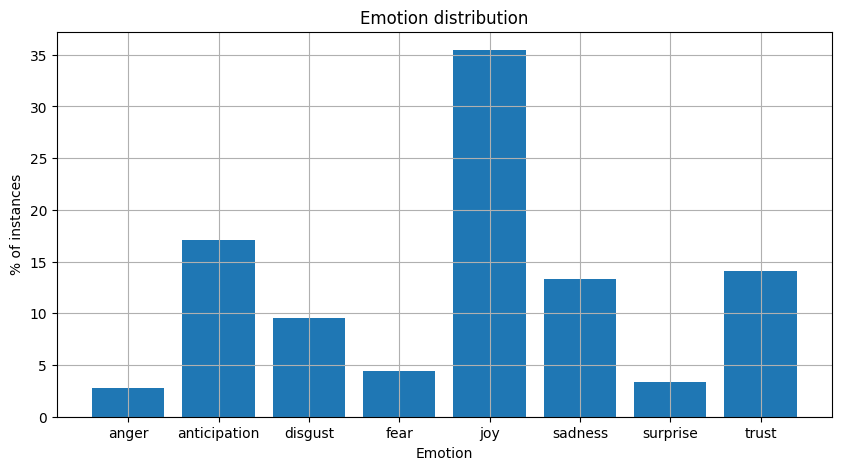

In [23]:
# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 5. Feature Engineering

#### 5.1 Count Vectorizer & Tweet Tokenizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

# create a function for the tweet tokenizer from NLTK
def tknzr(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

count_vect = CountVectorizer(max_features=100000, tokenizer=tknzr).fit(train_df['text'])
bow_transformed = count_vect.transform(train_df['text'])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 6. Model

In [25]:
from sklearn.model_selection import train_test_split

X_train = bow_transformed
y_train = train_df['emotion']
X_test = count_vect.transform(test_df['text'])
y_test = test_df['emotion']

In [26]:
# take a look at data dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 100000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 100000)
y_test.shape:  (411972,)


In [27]:
print(train_df.shape)
print(test_df.shape)

(1455563, 3)
(411972, 3)


#### 6.1 Deal with categorical label

In [28]:
# deal with label (string -> one-hot)

import keras
from keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 0    anticipation
1         sadness
2            fear
3             joy
4    anticipation
5             joy
6         sadness
7    anticipation
Name: emotion, dtype: object

y_train.shape:  (1455563,)


#### 6.2 Build model

In [29]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  100000
output_shape:  8


In [30]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100000)]          0         
                                                                 
 dense (Dense)               (None, 64)                6400064   
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)           (None, 8)                 0     

In [31]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 2
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger])

print('training finish')

Epoch 1/2


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


45487/45487 [==============================] - 3104s 68ms/step - loss: 1.2165 - accuracy: 0.5608
Epoch 2/2
45487/45487 [==============================] - 44002s 967ms/step - loss: 1.0708 - accuracy: 0.6141
training finish


#### 6.3  Predict on testing data

In [32]:
from sklearn.metrics import accuracy_score

# predict!
prediction = model.predict(X_test, batch_size=128)
prediction = label_decode(label_encoder, prediction)

3219/3219 [==============================] - 7s 2ms/step


In [33]:
# save as csv
test_df['emotion'] = prediction
output = test_df[['tweet_id', 'emotion']].copy()
output = output.set_axis(["id", "emotion"], axis=1)
output.to_csv("submission.csv", index=False)
output

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,joy
33,0x26289a,trust
...,...,...
1867525,0x2913b4,joy
1867529,0x2a980e,anticipation
1867530,0x316b80,sadness
1867531,0x29d0cb,joy
